In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving plant_production.csv to plant_production.csv


Total production per product:
 product
Widget         61563
Thingamajig    56863
Gadget         55886
Name: units_produced, dtype: int64 

Total production per month:
 month
8     19320
5     18190
4     16100
2     15181
12    15050
6     14389
9     14322
1     14045
10    13336
11    12836
7     11867
3      9676
Name: units_produced, dtype: int64

Varibility per month: 
 product
Thingamajig    72.994990
Widget         72.751365
Gadget         71.602441
Name: units_produced, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

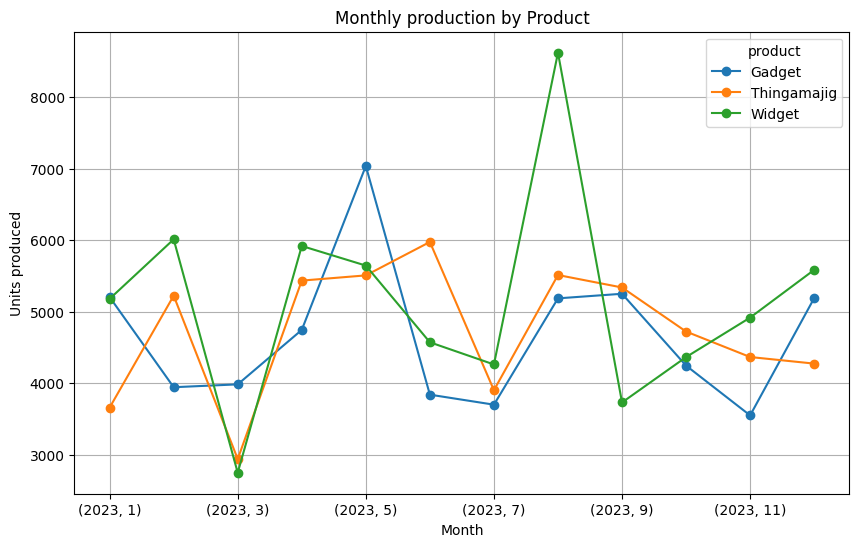

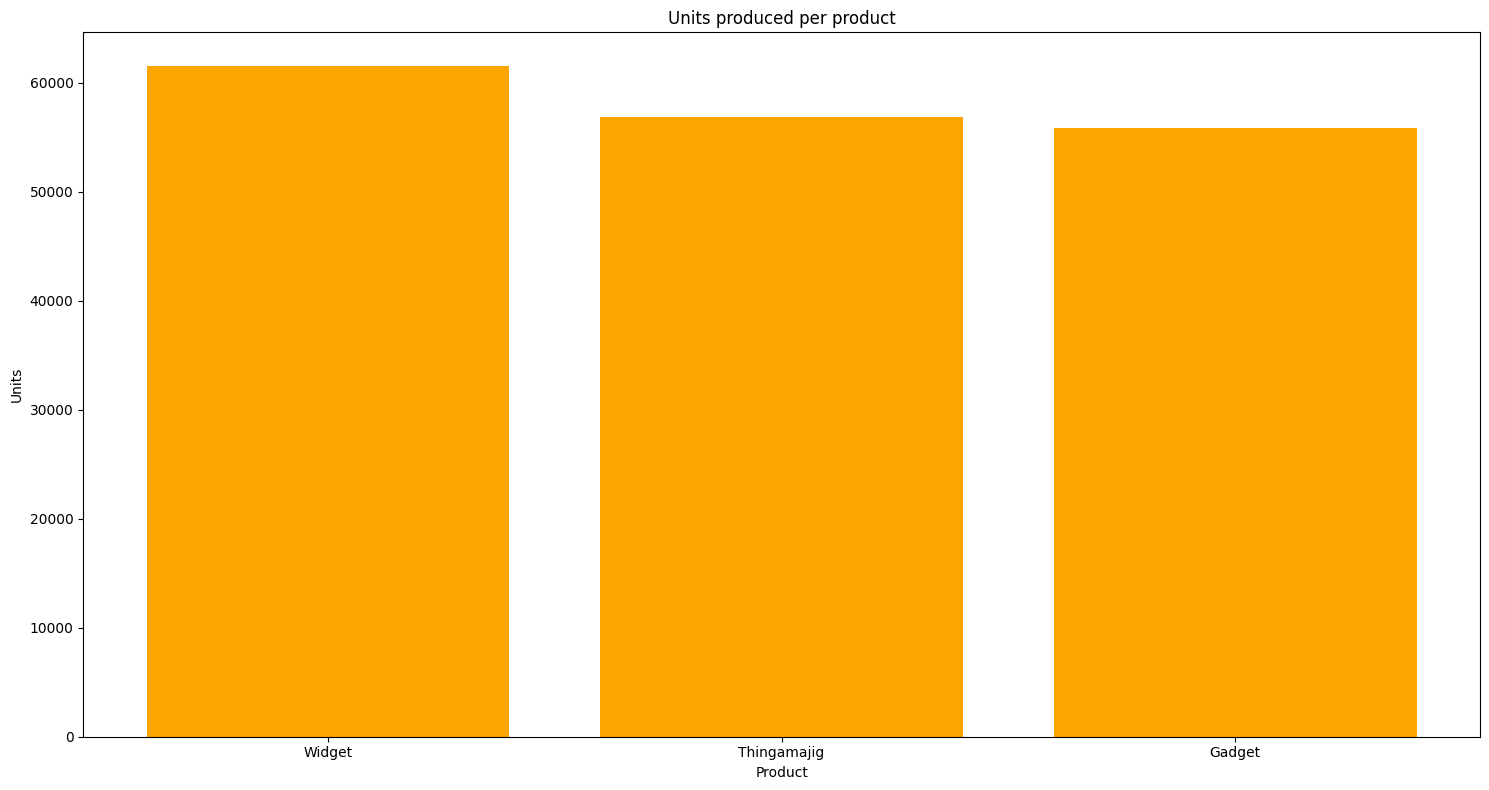

In [43]:
df = pd.read_csv('plant_production.csv')

#Preliminar data set
df.head()

#Cleaning
#Transforming date to datetime format
df['date']= pd.to_datetime(df['date'])

#Checking for null values
df.isnull().sum()

#Checking for duplicated rows
df.duplicated().sum()

#Transforming
#Creating new columns titled and storing 'year' and 'month'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

#grouping year, month, product with the total sum of the unit produced
monthly_production = df.groupby(['year', 'month', 'product'])['units_produced'].sum().reset_index()

#Analysis

#most produced product
unit_production = df.groupby(['product'])['units_produced'].sum().sort_values(ascending=False)
print('Total production per product:\n', unit_production, '\n')

#most productive month
max_monthly_production = df.groupby(['month'])['units_produced'].sum().sort_values(ascending=False)
print('Total production per month:\n', max_monthly_production)

#variability of product
production_per_month = df.groupby(['product', 'month'])['units_produced'].sum()
variability = df.groupby(['product'])['units_produced'].std().sort_values(ascending=False)
print('\nVaribility per month: \n', variability)

#summary to csv
monthly_production.to_csv('monthly_production_summary.csv', index=False)
files.download('monthly_production_summary.csv')

#visualization

#Line graph
import matplotlib.pyplot as plt
pivot = monthly_production.pivot_table(
    index = ['year', 'month'],
    columns = 'product',
    values = 'units_produced'
)

pivot.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Monthly production by Product')
plt.xlabel('Month')
plt.ylabel('Units produced')
plt.grid(True)
plt.show()

#Bar graph
plt.figure(figsize=(15, 8))
plt.bar(unit_production.index, unit_production.values, color='orange', linewidth=2)
plt.title('Units produced per product')
plt.xlabel('Product')
plt.ylabel('Units')
plt.tight_layout()
plt.show()
